In [207]:
import pandas as pd

In [208]:
pd.set_option('display.max_columns', None)

In [254]:
df = pd.read_csv("4_1_vaers_k_means_clusters_scaling.csv")

In [255]:
df

,VAERS_ID,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,Headache,Chills,Pyrexia,Fatigue,Pain,Nausea,Dizziness,Pain in extremity,Myalgia,Injection site pain,Injection site erythema,Dyspnoea,Arthralgia,Pruritus,Injection site swelling,Death,Rash,Asthenia,Vomiting,SARS-CoV-2 test positive,Injection site pruritus,Erythema,Malaise,Diarrhoea,COVID-19,Injection site warmth,Paraesthesia,Urticaria,Hypoaesthesia,Cough,Lymphadenopathy,Feeling abnormal,Hyperhidrosis,Chest discomfort,Heart rate increased,Chest pain,SARS-CoV-2 test,Flushing,Palpitations,Peripheral swelling,Condition aggravated,SARS-CoV-2 test negative,Feeling hot,Injection site rash,Vaccination site pain,Blood test,Back pain,Decreased appetite,Blood pressure increased,Electrocardiogram,Oropharyngeal pain,Swelling,Tachycardia,Paraesthesia oral,Body temperature increased,Tremor,Neck pain,Skin warm,Body temperature,Computerised tomogram,Throat tightness,Hypertension,Injection site induration,Rash erythematous,Facial paralysis,Syncope,Laboratory test,Loss of consciousness,Mobility decreased,Anxiety,Throat irritation,Full blood count,Abdominal pain,Fall,Chest X-ray,Impaired work ability,Influenza like illness,Muscular weakness,Rash pruritic,Hypoaesthesia oral,Unresponsive to stimuli,Confusional state,Swelling face,Lethargy,Cerebrovascular accident,Immediate post-injection reaction,Feeling cold,Dysphagia,Abdominal pain upper,Anaphylactic reaction,Migraine,Lip swelling,Injection site reaction,Swollen tongue,Gait disturbance,Axillary pain,Burning sensation,Electrocardiogram normal,Limb discomfort,Musculoskeletal stiffness,Magnetic resonance imaging,Metabolic function test,Pharyngeal swelling,Dysgeusia,Insomnia,Lymph node pain,Abdominal discomfort,Nasal congestion,Rhinorrhoea,Hypotension,No adverse event,Tenderness,Chest X-ray normal,Hypersensitivity,Ageusia,Atrial fibrillation,Sleep disorder,Heart rate,Vertigo,Pneumonia,Vision blurred,Intensive care,Echocardiogram,Discomfort,Cardiac arrest,Muscle spasms,Exposure during pregnancy,Blood pressure measurement,Rash macular,Herpes zoster,Computerised tomogram head,Drug ineffective,Somnolence,Wheezing,Hot flush,Anosmia,Inappropriate schedule of product administration,Balance disorder,Oxygen saturation decreased,Injection site urticaria,Pallor,Cold sweat,Chest X-ray abnormal,Injected limb mobility decreased,Eye swelling,Product administered to patient of inappropriate age,Full blood count normal,Vaccination site swelling,Aphasia,Tinnitus,Seizure,Incorrect dose administered,Injection site mass,Dehydration,Blood glucose increased,Respiratory tract congestion,Induration,Ear pain,Hypoxia,Cellulitis,Gait inability,Laboratory test normal,Electrocardiogram abnormal,Dysarthria,Resuscitation,Blood creatinine increased,Blood test normal,Eye pain,Night sweats,Vaccination site erythema,Rash papular,Dysstasia,Dry mouth,Presyncope,Pulmonary embolism,Computerised tomogram normal,Platelet count decreased,Computerised tomogram head normal,Endotracheal intubation,Dysphonia,Unevaluable event,Exposure to SARS-CoV-2,Loss of personal independence in daily activities,Oedema peripheral,Disorientation,Myocardial infarction,Underdose,Contusion,Hypersomnia,Illness,Angiogram,Nasopharyngitis,Angioedema,Head discomfort,Computerised tomogram abnormal,Troponin increased,Product storage error,COVID-19 pneumonia,Sensation of foreign body,Joint range of motion decreased,Blood pressure decreased,Mental status changes,Hemiparesis,Nervousness,Blood glucose normal,Echocardiogram normal,Joint swelling,Eye pruritus,Influenza virus test negative,Muscle tightness,Retching,Speech disorder,Injection site bruising,Vaccination site warmth,Visual impairment,Urinary tract infection,X-ray,Peripheral coldness,Pain in jaw,Ear discomfort,Aspartate aminotransferase increased,Acute kidney injury,Epistaxis,Magnetic resonance imaging brain,Product preparation issue,C-reactive protein increased,Deep vein thrombosis,Pulse ab

In [256]:
df['SERIOUS'] = (df['DIED'] | df['HOSPITAL'] | df['L_THREAT'] | df['DISABLE'] | df['BIRTH_DEFECT'])

In [257]:
allergy_columns = ['ALLERGY_SULFA', 'ALLERGY_PENICILLIN', 'ALLERGY_CODEINE',
       'ALLERGY_LATEX', 'ALLERGY_AMOXICILLIN', 'ALLERGY_SHELLFISH',
       'ALLERGY_MORPHINE', 'ALLERGY_BACTRIM', 'ALLERGY_ERYTHROMYCIN']
df['ALLERGY_COUNT'] = df[allergy_columns].sum(axis=1)

In [258]:
med_columns = ['MED_ASPIRIN', 'MED_METFORMIN',
       'MED_ATORVASTATIN', 'MED_LISINOPRIL', 'MED_SIMVASTATIN',
       'MED_SYNTHROID', 'MED_AMLODIPINE', 'MED_ACETAMINOPHEN',
       'MED_METOPROLOL', 'MED_TYLENOL', 'MED_LEVOTHYROXINE', 'MED_CALCIUM',
       'MED_LIPITOR', 'MED_GABAPENTIN', 'MED_OMEPRAZOLE', 'MED_QHS']
df['MED_COUNT'] = df[med_columns].sum(axis=1)

In [259]:
history_columns = ['HISTORY_ASHTMA', 'HISTORY_DIABETES', 'HISTORY_HTN', 'HISTORY_CANCER',
       'HISTORY_HEART', 'HISTORY_HYPERLIPIDEMIA', 'HISTORY_DEPRESSION',
       'HISTORY_ARTHRITIS', 'HISTORY_OBESITY', 'HISTORY_ANEMIA',
       'HISTORY_GERD', 'HISTORY_COPD']
df['HISTORY_COUNT'] = df[history_columns].sum(axis=1)

In [260]:
df_new = df[['HISTORY_COUNT', 'MED_COUNT', 'ALLERGY_COUNT', 'SEX_M', 'SEX_U', 'RECOVD_U',
       'RECOVD_Y', 'Cluster_Label_2', 'Cluster_Label_3', 'Cluster_Label_5', 'Cluster_Label_4',
       'Cluster_Label_6', 'SERIOUS', 'AGE_YRS', 'DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'DISABLE', 'NUMDAYS', 'BIRTH_DEFECT', 'OFC_VISIT',
       'ER_ED_VISIT', 'MULTIPLE_VAX', 'COUNT_SYMP', 'COVID_POSITIVE', 'COVID_NEGATIVE']]

In [261]:
df.to_csv("vaers_k_means_cluster_all_columns.csv",index=False)

In [262]:
df_new.to_csv("vaers_k_means_cluster_truncated.csv",index=False)

In [263]:
df

,VAERS_ID,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,Headache,Chills,Pyrexia,Fatigue,Pain,Nausea,Dizziness,Pain in extremity,Myalgia,Injection site pain,Injection site erythema,Dyspnoea,Arthralgia,Pruritus,Injection site swelling,Death,Rash,Asthenia,Vomiting,SARS-CoV-2 test positive,Injection site pruritus,Erythema,Malaise,Diarrhoea,COVID-19,Injection site warmth,Paraesthesia,Urticaria,Hypoaesthesia,Cough,Lymphadenopathy,Feeling abnormal,Hyperhidrosis,Chest discomfort,Heart rate increased,Chest pain,SARS-CoV-2 test,Flushing,Palpitations,Peripheral swelling,Condition aggravated,SARS-CoV-2 test negative,Feeling hot,Injection site rash,Vaccination site pain,Blood test,Back pain,Decreased appetite,Blood pressure increased,Electrocardiogram,Oropharyngeal pain,Swelling,Tachycardia,Paraesthesia oral,Body temperature increased,Tremor,Neck pain,Skin warm,Body temperature,Computerised tomogram,Throat tightness,Hypertension,Injection site induration,Rash erythematous,Facial paralysis,Syncope,Laboratory test,Loss of consciousness,Mobility decreased,Anxiety,Throat irritation,Full blood count,Abdominal pain,Fall,Chest X-ray,Impaired work ability,Influenza like illness,Muscular weakness,Rash pruritic,Hypoaesthesia oral,Unresponsive to stimuli,Confusional state,Swelling face,Lethargy,Cerebrovascular accident,Immediate post-injection reaction,Feeling cold,Dysphagia,Abdominal pain upper,Anaphylactic reaction,Migraine,Lip swelling,Injection site reaction,Swollen tongue,Gait disturbance,Axillary pain,Burning sensation,Electrocardiogram normal,Limb discomfort,Musculoskeletal stiffness,Magnetic resonance imaging,Metabolic function test,Pharyngeal swelling,Dysgeusia,Insomnia,Lymph node pain,Abdominal discomfort,Nasal congestion,Rhinorrhoea,Hypotension,No adverse event,Tenderness,Chest X-ray normal,Hypersensitivity,Ageusia,Atrial fibrillation,Sleep disorder,Heart rate,Vertigo,Pneumonia,Vision blurred,Intensive care,Echocardiogram,Discomfort,Cardiac arrest,Muscle spasms,Exposure during pregnancy,Blood pressure measurement,Rash macular,Herpes zoster,Computerised tomogram head,Drug ineffective,Somnolence,Wheezing,Hot flush,Anosmia,Inappropriate schedule of product administration,Balance disorder,Oxygen saturation decreased,Injection site urticaria,Pallor,Cold sweat,Chest X-ray abnormal,Injected limb mobility decreased,Eye swelling,Product administered to patient of inappropriate age,Full blood count normal,Vaccination site swelling,Aphasia,Tinnitus,Seizure,Incorrect dose administered,Injection site mass,Dehydration,Blood glucose increased,Respiratory tract congestion,Induration,Ear pain,Hypoxia,Cellulitis,Gait inability,Laboratory test normal,Electrocardiogram abnormal,Dysarthria,Resuscitation,Blood creatinine increased,Blood test normal,Eye pain,Night sweats,Vaccination site erythema,Rash papular,Dysstasia,Dry mouth,Presyncope,Pulmonary embolism,Computerised tomogram normal,Platelet count decreased,Computerised tomogram head normal,Endotracheal intubation,Dysphonia,Unevaluable event,Exposure to SARS-CoV-2,Loss of personal independence in daily activities,Oedema peripheral,Disorientation,Myocardial infarction,Underdose,Contusion,Hypersomnia,Illness,Angiogram,Nasopharyngitis,Angioedema,Head discomfort,Computerised tomogram abnormal,Troponin increased,Product storage error,COVID-19 pneumonia,Sensation of foreign body,Joint range of motion decreased,Blood pressure decreased,Mental status changes,Hemiparesis,Nervousness,Blood glucose normal,Echocardiogram normal,Joint swelling,Eye pruritus,Influenza virus test negative,Muscle tightness,Retching,Speech disorder,Injection site bruising,Vaccination site warmth,Visual impairment,Urinary tract infection,X-ray,Peripheral coldness,Pain in jaw,Ear discomfort,Aspartate aminotransferase increased,Acute kidney injury,Epistaxis,Magnetic resonance imaging brain,Product preparation issue,C-reactive protein increased,Deep vein thrombosis,Pulse ab

In [264]:
df_new.groupby('Cluster_Label_2').agg(['mean'])

,HISTORY_COUNT,MED_COUNT,ALLERGY_COUNT,SEX_M,SEX_U,RECOVD_U,RECOVD_Y,Cluster_Label_3,Cluster_Label_5,Cluster_Label_4,Cluster_Label_6,SERIOUS,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,COUNT_SYMP,COVID_POSITIVE,COVID_NEGATIVE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Label_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.332776,0.004444,0.169917,0.280912,0.038689,0.225493,0.335233,0.862550,3.299158,2.313170,2.453390,0.209076,52.733884,0.067339,0.032938,0.000261,0.125477,0.306635,0.001464,0.024573,2.918910,0.001568,0.144142,0.140064,0.010875,2.244942,0.049982,0.021540
1,0.462484,0.005056,0.257497,0.217971,0.007928,0.136160,0.355165,1.323567,1.918189,1.594278,0.651729,0.244513,50.204987,0.039642,0.058486,0.000460,0.171205,0.420085,0.001609,0.034471,2.210157,0.001724,0.195565,0.236585,0.015397,6.590371,0.032288,0.069631


In [265]:
df_new.groupby('Cluster_Label_3').agg(['mean'])

,HISTORY_COUNT,MED_COUNT,ALLERGY_COUNT,SEX_M,SEX_U,RECOVD_U,RECOVD_Y,Cluster_Label_2,Cluster_Label_5,Cluster_Label_4,Cluster_Label_6,SERIOUS,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,COUNT_SYMP,COVID_POSITIVE,COVID_NEGATIVE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Label_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.307409,0.004229,0.138720,0.308972,0.056996,0.260066,0.322302,0.000000,2.889042,1.896304,1.270270,0.224214,53.876632,0.085402,0.031256,0.000368,0.120059,0.283324,0.001655,0.025740,3.080897,0.002114,0.134492,0.120335,0.010940,1.328553,0.058375,0.017191
1,0.475115,0.004926,0.263292,0.206727,0.007644,0.136232,0.346017,1.000000,0.994394,0.981994,0.871921,0.254289,50.043656,0.036012,0.064379,0.000510,0.177849,0.437744,0.001699,0.037031,2.034653,0.001189,0.200612,0.252590,0.015967,7.351113,0.036861,0.081196
2,0.384004,0.004880,0.219792,0.243290,0.013014,0.168730,0.357885,0.254496,3.842386,2.865793,3.040850,0.198012,51.052689,0.044465,0.037958,0.000181,0.138906,0.349028,0.001265,0.024582,2.672662,0.001356,0.164031,0.175508,0.011658,3.846995,0.034794,0.031902


In [266]:
df_new.groupby('Cluster_Label_5').agg(['mean'])

,HISTORY_COUNT,MED_COUNT,ALLERGY_COUNT,SEX_M,SEX_U,RECOVD_U,RECOVD_Y,Cluster_Label_2,Cluster_Label_3,Cluster_Label_4,Cluster_Label_6,SERIOUS,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,COUNT_SYMP,COVID_POSITIVE,COVID_NEGATIVE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Label_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.133962,0.032075,0.266038,0.516981,0.001887,0.126415,0.254717,0.298113,1.137736,0.192453,2.907547,1.000000,69.322642,0.150943,0.269811,0.000000,1.000000,9.050943,0.000000,0.154717,5.222642,0.003774,0.173585,0.432075,0.030189,3.500000,0.058491,0.088679
1,0.455273,0.005047,0.262443,0.201706,0.007832,0.135225,0.349286,1.000000,1.000000,0.998608,0.810129,0.238253,49.585103,0.032892,0.060216,0.000522,0.161156,0.274278,0.001566,0.034459,1.723112,0.001218,0.200661,0.246258,0.015489,7.368082,0.035503,0.081100
2,0.504708,0.008475,0.174200,0.410546,0.016008,0.209040,0.168550,0.116761,0.721281,0.929379,4.949153,0.609228,63.651601,0.254237,0.085687,0.000942,0.325800,0.589454,0.003766,0.053672,22.161017,0.006591,0.203390,0.202448,0.045198,2.298493,0.108286,0.048023
3,0.286326,0.003287,0.136839,0.297381,0.060353,0.265810,0.334230,0.000000,0.000000,1.995020,1.000000,0.184643,52.928095,0.070411,0.023504,0.000299,0.094114,0.107758,0.001593,0.022109,1.796335,0.001892,0.130366,0.115028,0.009162,1.336321,0.057664,0.015238
4,0.359966,0.003923,0.218448,0.231078,0.013396,0.168692,0.366089,0.255956,2.000000,2.991101,2.976270,0.165247,50.221893,0.037030,0.030906,0.000191,0.109368,0.137786,0.001244,0.020189,1.992537,0.000957,0.161611,0.164960,0.009281,3.850732,0.029471,0.028801


In [267]:
cluster_dim = df.groupby('Cluster_Label_5').count()['VAERS_ID'].to_list()

In [302]:
#df=pd.read_csv("7_1_vaers_k_means_scaled_cluster_all_columns.csv")
df_s=df[history_columns]

#seleziono il modello
df_s['Cluster_Label_5']=df['Cluster_Label_5'].tolist()
df_grouped=df_s.groupby(['Cluster_Label_5']).sum()
#print(df_grouped)
for c in df_grouped.columns:
    for i in range(5):
        df_grouped[c]=df_grouped[c].astype(float)
        val=round(df_grouped[c][i]/cluster_dim[i]*100,2)
        df_grouped[c][i]=val

#df_grouped.to_csv("table.csv")


<ipython-input-302-fcd6cd53521e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Cluster_Label_5']=df['Cluster_Label_5'].tolist()
<ipython-input-302-fcd6cd53521e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped[c][i]=val


In [303]:
df_grouped

,HISTORY_ASHTMA,HISTORY_DIABETES,HISTORY_HTN,HISTORY_CANCER,HISTORY_HEART,HISTORY_HYPERLIPIDEMIA,HISTORY_DEPRESSION,HISTORY_ARTHRITIS,HISTORY_OBESITY,HISTORY_ANEMIA,HISTORY_GERD,HISTORY_COPD,HISTORY_COUNT
Cluster_Label_5,,,,,,,,,,,,,
0,4.72,17.17,29.43,5.09,9.06,11.13,5.47,6.79,3.77,6.04,7.74,6.98,113.40
1,8.42,5.40,9.50,2.35,2.58,1.98,3.85,3.78,2.11,1.22,3.10,1.25,45.53
2,3.20,6.40,14.22,3.01,3.67,4.99,2.82,2.92,1.69,1.79,3.20,2.54,50.47
3,3.33,3.64,7.61,1.21,2.09,1.98,1.78,2.06,1.03,0.88,1.76,1.27,28.63
4,5.66,4.20,8.41,1.52,2.09,2.08,2.84,3.04,1.51,0.88,2.56,1.20,36.00


In [304]:
pd.DataFrame(df_grouped)

,HISTORY_ASHTMA,HISTORY_DIABETES,HISTORY_HTN,HISTORY_CANCER,HISTORY_HEART,HISTORY_HYPERLIPIDEMIA,HISTORY_DEPRESSION,HISTORY_ARTHRITIS,HISTORY_OBESITY,HISTORY_ANEMIA,HISTORY_GERD,HISTORY_COPD,HISTORY_COUNT
Cluster_Label_5,,,,,,,,,,,,,
0,4.72,17.17,29.43,5.09,9.06,11.13,5.47,6.79,3.77,6.04,7.74,6.98,113.40
1,8.42,5.40,9.50,2.35,2.58,1.98,3.85,3.78,2.11,1.22,3.10,1.25,45.53
2,3.20,6.40,14.22,3.01,3.67,4.99,2.82,2.92,1.69,1.79,3.20,2.54,50.47
3,3.33,3.64,7.61,1.21,2.09,1.98,1.78,2.06,1.03,0.88,1.76,1.27,28.63
4,5.66,4.20,8.41,1.52,2.09,2.08,2.84,3.04,1.51,0.88,2.56,1.20,36.00


In [307]:
df_grouped.reset_index()

,Cluster_Label_5,HISTORY_ASHTMA,HISTORY_DIABETES,HISTORY_HTN,HISTORY_CANCER,HISTORY_HEART,HISTORY_HYPERLIPIDEMIA,HISTORY_DEPRESSION,HISTORY_ARTHRITIS,HISTORY_OBESITY,HISTORY_ANEMIA,HISTORY_GERD,HISTORY_COPD,HISTORY_COUNT
0,0,4.72,17.17,29.43,5.09,9.06,11.13,5.47,6.79,3.77,6.04,7.74,6.98,113.40
1,1,8.42,5.40,9.50,2.35,2.58,1.98,3.85,3.78,2.11,1.22,3.10,1.25,45.53
2,2,3.20,6.40,14.22,3.01,3.67,4.99,2.82,2.92,1.69,1.79,3.20,2.54,50.47
3,3,3.33,3.64,7.61,1.21,2.09,1.98,1.78,2.06,1.03,0.88,1.76,1.27,28.63
4,4,5.66,4.20,8.41,1.52,2.09,2.08,2.84,3.04,1.51,0.88,2.56,1.20,36.00


In [236]:
#df=pd.read_csv("7_1_vaers_k_means_scaled_cluster_all_columns.csv")
df_s=df[med_columns]

#seleziono il modello
df_s['Cluster_Label_5']=df['Cluster_Label_5'].tolist()
df_grouped=df_s.groupby(['Cluster_Label_5']).sum()

for c in df_grouped.columns:
    for i in range(5):
        df_grouped[c]=df_grouped[c].astype(float)
        val=round(df_grouped[c][i]/cluster_dim[i]*100,2)
        df_grouped[c][i]=val

#df_grouped.to_csv("table.csv")

df_grouped.transpose()

<ipython-input-236-47bb04f10afb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Cluster_Label_5']=df['Cluster_Label_5'].tolist()
<ipython-input-236-47bb04f10afb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped[c][i]=val


Cluster_Label_5,0,1,2,3,4
MED_ASPIRIN,0.57,0.02,0.09,0.01,0.03
MED_METFORMIN,0.00,0.00,0.00,0.00,0.00
MED_ATORVASTATIN,0.38,0.02,0.00,0.00,0.00
MED_LISINOPRIL,0.19,0.02,0.09,0.00,0.00
MED_SIMVASTATIN,0.00,0.00,0.00,0.00,0.00
MED_SYNTHROID,0.00,0.00,0.09,0.00,0.01
MED_AMLODIPINE,0.19,0.00,0.00,0.00,0.01
MED_ACETAMINOPHEN,0.19,0.03,0.09,0.02,0.05
MED_METOPROLOL,0.19,0.02,0.00,0.00,0.04
MED_TYLENOL,0.00,0.30,0.00,0.02,0.11


In [225]:
#df=pd.read_csv("7_1_vaers_k_means_scaled_cluster_all_columns.csv")
df_s=df[allergy_columns]

#seleziono il modello
df_s['Cluster_Label_5']=df['Cluster_Label_5'].tolist()
df_grouped=df_s.groupby(['Cluster_Label_5']).sum()

for c in df_grouped.columns:
    for i in range(5):
        df_grouped[c]=df_grouped[c].astype(float)
        val=round(df_grouped[c][i]/cluster_dim[i]*100,2)
        df_grouped[c][i]=val

#df_grouped.to_csv("table.csv")

df_grouped.transpose()

<ipython-input-225-bcd2110e4774>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Cluster_Label_5']=df['Cluster_Label_5'].tolist()
<ipython-input-225-bcd2110e4774>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped[c][i]=val


Cluster_Label_5,0,1,2,3,4
ALLERGY_SULFA,7.36,6.84,3.86,3.54,6.33
ALLERGY_PENICILLIN,8.87,7.17,5.56,4.30,6.34
ALLERGY_CODEINE,2.45,2.40,2.17,1.22,1.67
ALLERGY_LATEX,0.94,2.91,1.88,1.28,1.90
ALLERGY_AMOXICILLIN,1.32,1.25,0.94,0.60,1.38
ALLERGY_SHELLFISH,0.75,1.83,0.56,0.90,1.40
ALLERGY_MORPHINE,2.26,1.78,1.04,0.85,1.05
ALLERGY_BACTRIM,0.94,1.11,0.56,0.49,0.92
ALLERGY_ERYTHROMYCIN,1.70,0.96,0.85,0.52,0.84


In [316]:
df_new[['AGE_YRS','HOSPDAYS', 'NUMDAYS', 'COUNT_SYMP', 'Cluster_Label_5']]

,HISTORY_COUNT,MED_COUNT,ALLERGY_COUNT,SEX_M,SEX_U,RECOVD_U,RECOVD_Y,Cluster_Label_2,Cluster_Label_3,Cluster_Label_5,Cluster_Label_4,Cluster_Label_6,SERIOUS,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,COUNT_SYMP,COVID_POSITIVE,COVID_NEGATIVE
0,0,0,1,0,0,0,1,0,0,3,2,1,False,33.0,False,False,False,False,0.0,False,False,2.0,False,True,False,0,1,False,False
1,0,0,0,0,0,0,1,0,0,3,2,1,False,73.0,False,False,False,False,0.0,False,False,0.0,False,True,False,0,2,False,False
2,0,0,1,0,0,1,0,0,2,4,3,4,False,23.0,False,False,False,False,0.0,False,False,0.0,False,False,True,0,4,False,False
3,1,0,0,0,0,0,1,0,2,4,3,4,False,58.0,False,False,False,False,0.0,False,False,0.0,False,False,False,0,3,False,False
4,0,0,0,0,0,0,0,0,2,4,3,4,False,47.0,False,False,False,False,0.0,False,False,7.0,False,False,False,0,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27825,0,0,0,0,0,1,0,0,0,3,2,1,True,70.0,True,False,False,True,0.0,False,False,4.0,False,False,True,0,1,False,False
27826,0,0,0,1,0,0,0,0,0,3,2,1,True,77.0,True,False,False,False,0.0,False,False,1.0,False,False,False,0,1,False,False
27827,0,0,0,0,0,0,0,0,0,3,2,1,True,88.0,True,False,False,False,0.0,False,False,1.0,False,False,False,0,1,False,False
27828,1,0,0,1,0,0,0,0,0,3,2,1,True,69.0,True,False,False,False,0.0,False,False,12.0,False,False,False,0,0,False,False


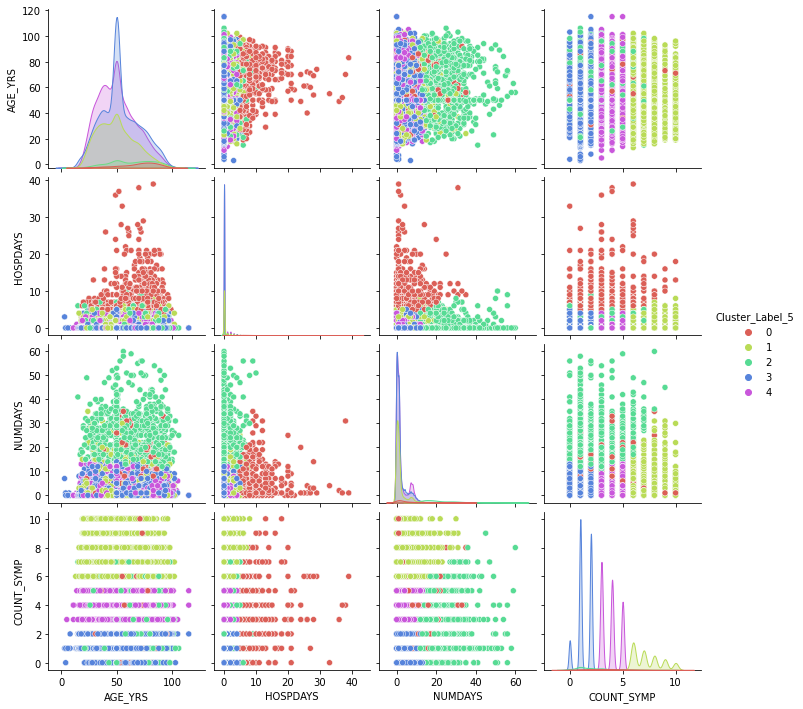

In [318]:
sns.pairplot(df_new[['AGE_YRS','HOSPDAYS', 'NUMDAYS', 'COUNT_SYMP', 'Cluster_Label_5']], hue='Cluster_Label_5', palette=sns.color_palette("hls", 5))

In [319]:
df_new.groupby('Cluster_Label_5')[['AGE_YRS','HOSPDAYS', 'NUMDAYS', 'COUNT_SYMP', 'Cluster_Label_5']].agg(['mean'])

,AGE_YRS,HOSPDAYS,NUMDAYS,COUNT_SYMP,Cluster_Label_5
,mean,mean,mean,mean,mean
Cluster_Label_5,,,,,
0,69.322642,9.050943,5.222642,3.500000,0
1,49.585103,0.274278,1.723112,7.368082,1
2,63.651601,0.589454,22.161017,2.298493,2
3,52.928095,0.107758,1.796335,1.336321,3
4,50.221893,0.137786,1.992537,3.850732,4
